In [338]:
#Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Import Libraries and Data

***Import Packages and Libraries***

In [339]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [340]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

***Import and Visualize Data***

In [341]:
df = pd.read_excel('Comments_Data_Extracts_01.xlsx')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  9546 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


(9546, 1)

In [342]:
df.head()
df.columns
len(df)

,Comments
0,I just bought this projector and i am clueless...
1,You promised me a multi card reader for leavin...
2,"Hello Apeman, your team is not responding to m..."
3,"Great picture, I am so excited about looking f..."
4,I have just bought the Apeman 550 dashcam and ...


Index(['Comments'], dtype='object')

9546

In [343]:
print(df)

                                               Comments
0     I just bought this projector and i am clueless...
1     You promised me a multi card reader for leavin...
2     Hello Apeman, your team is not responding to m...
3     Great picture, I am so excited about looking f...
4     I have just bought the Apeman 550 dashcam and ...
...                                                 ...
9541  Did You see it? 🙈https://t.co/X1b3ZyrGbeLet th...
9542  4inch FHD 1080P DVR camera RecorderWhatsApp/We...
9543  📷 4inch FHD 1080P DVR camera Recorder WhatsApp...
9544  #autobrighttech #AutobrightTech #caraccessorie...
9545  📷 #autobrighttech #AutobrightTech #caraccessor...

[9546 rows x 1 columns]


# Text Preprocessing & EDA

In [344]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [345]:
# Spell correct using text blob for the first 5 records
from textblob import TextBlob
dfs = df['Comments'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [346]:
dfs

0    I just bought this protector and i am careless...
1    You promised me a multi card reader for leavin...
2    Hello Apeman, your team is not responding to m...
3    Great picture, I am so excited about looking f...
4    I have just bought the Apeman 550 dashcam and ...
Name: Comments, dtype: object

In [347]:
corpus1 = [] # form an empty list called corpus1
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 9546): # iterate through the list of all 9546 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Comments[i])
  # convert all words to lower case
  df_cln = df_cln.lower()
  # split sentences into words
  df_cln = df_cln.split()
  # remove English stop words
  df_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  df_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  df_cln = " ".join(df_cln)
  # append to the list to get all Comments in one place
  corpus1.append(df_cln)
#print(corpus1)

# PoS Tagging
Ref: https://www.kaggle.com/tarunpaparaju/jigsaw-competition-part-of-speech-tagging

In [348]:
import os
import numpy as np

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

from nltk import word_tokenize, pos_tag
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
pos_tags = df['Comments'].progress_apply(lambda x: pos_tag(word_tokenize(x)))
targets = df['Comments']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [349]:
print(pos_tags[100])

[('Full', 'NNP'), ('link', 'NN'), ('in', 'IN'), ('bio', 'NN'), ('☠🏆🚔🚨📸🎥', 'NNP'), ('#', '#'), ('london', 'RB'), ('#', '#'), ('dashcam', 'JJ'), ('#', '#'), ('driving', 'VBG'), ('#', '#'), ('ukdashcams', 'JJ'), ('#', '#'), ('ukbikers', 'NNS'), ('#', '#'), ('fails', 'NNS'), ('#', '#'), ('dashcamfails', 'NNS'), ('#', '#'), ('drivingfails', 'NNS'), ('#', '#'), ('roadrage', 'NN'), ('#', '#'), ('drivesafe', 'JJ'), ('#', '#'), ('roadsafetyawareness', 'JJ'), ('#', '#'), ('apemandashcam', 'JJ'), ('#', '#'), ('apemancamera', 'NN'), ('#', '#'), ('sonyvegas', 'JJ'), ('#', '#'), ('videoedits', 'NNS'), ('#', '#'), ('editfun…', 'JJ'), ('https', 'NN'), (':', ':'), ('//t.co/fknBB6GVS9', 'NN')]


In [350]:
tags = []
for i, tag in enumerate(pos_tags):
    pos_tags[i] = list(map(list, tag))
    tags.append(np.array(pos_tags[i])[:, 1])
flat_tags = np.concatenate([tag for tag in tags])

In [351]:
counts = [dict(Counter(tag)) for tag in tags]

In [352]:
def count_pos(tag_dict, tag_name):
    if tag_name in tag_dict:
        return tag_dict[tag_name]
    else:
        return 0

In [353]:
DATA_LEN = 1804874
SAMPLE_SIZE = 9546
all_tags = set(flat_tags)
df = pd.DataFrame(np.zeros((SAMPLE_SIZE, 1)))
df.columns = ['Comments']
df.count_dict = counts
df.target = targets

In [354]:
all_tags

{'#',
 '$',
 "''",
 '(',
 ')',
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WRB',
 '``'}

# Bag of Words

In [355]:
bagofwords=[]
for i in range (0,9546):
    words = corpus1[i].split()
    bagofwords.append(words)

In [356]:
bagofwords[9545]

['autobrighttech',
 'autobrighttech',
 'caraccessori',
 'autoaccessori',
 'otoaccessori',
 'vehicleaccessori',
 'dvr',
 'dvrcamera',
 'dvr',
 'dvr',
 'dvr',
 'dvrl',
 'carcamera',
 'carcamerarecord',
 'carcamerajapan',
 'carcamera',
 'carcamera']

In [357]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:9546])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['bought', 'projector', 'clueless', 'connect', 'iphon', 'promis', 'multi', 'card', 'reader', 'leav', 'review', 'im', 'still', 'wait', 'susi', 'hello', 'apeman', 'team', 'respond', 'email', 'fix', 'issu', 'multipl', 'follow', 'up', 'great', 'pictur', 'excit', 'look', 'k', 'camerajust', 'need', 'price', 'come', 'littl', 'look', 'forward', 'futur', 'adventur', 'run', 'camera', 'thejogshop', 'brighton', 'runningrunp', 'puresportsperformac', 'ukrunchat', 'bought', 'apeman', 'dashcam', 'find', 'rear', 'camer', 'cabl', 'metr', 'short', 'anyon', 'got', 'idea', 'get', 'short', 'extens', 'possibl', 'tri', 'price', 'terribl', 'compani', 'product', 'china', 'sayhidden', 'design', 'hid', 'hello', 'camera', 'apeman', 'app', 'use', 'wifi', 'bad', 'news', 'apeman', 'put', 'mine', 'garbag', 'done', 'cheap', 'product', 'good', 'trailcam', 'got', 'apeman', 'excel', 'may', 'know', 'price', 'ill', 'test', 'c', 'dash', 'cam', 'advertis', 'say', 'card', 'includedbuy', 'person', 'could', 'order', 'one', 'time

[('gadget', 2611),
 ('car', 1031),
 ('tech', 741),
 ('new', 549),
 ('electriccar', 509),
 ('via', 453),
 ('electr', 432),
 ('technolog', 424),
 ('autonomousvehicl', 415),
 ('smart', 378),
 ('watch', 374),
 ('camera', 372),
 ('travel', 337),
 ('electron', 336),
 ('use', 305),
 ('selfdriv', 283),
 ('amp', 282),
 ('drive', 280),
 ('autonom', 279),
 ('vehicl', 272)]

# Word Frequency

In [358]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word_df.head()

,words,Freq
0,gadget,2611
1,car,1031
2,tech,741
3,new,549
4,electriccar,509


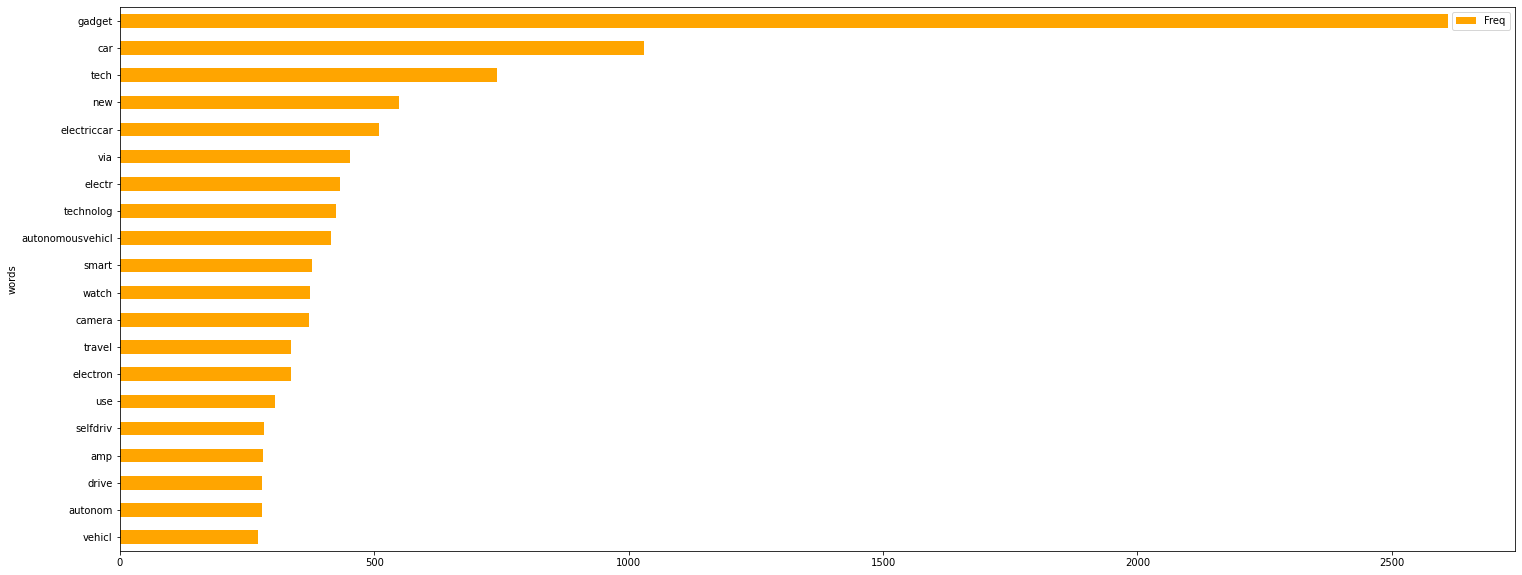

In [359]:
fig,ax=plt.subplots(figsize=(25,10))
freq_word_df.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='orange')
plt.show();

# Word Cloud

In [360]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

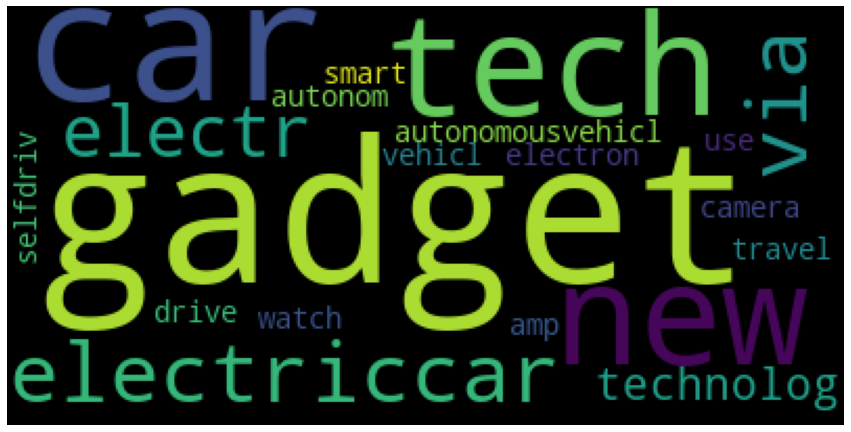

In [361]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word2Vec

In [362]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [363]:
from gensim.models import Word2Vec

word2vec = Word2Vec(bagofwords, min_count=2)

In [364]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'bought': <gensim.models.keyedvectors.Vocab object at 0x7f62ef4e0ef0>, 'projector': <gensim.models.keyedvectors.Vocab object at 0x7f62e6b6b160>, 'connect': <gensim.models.keyedvectors.Vocab object at 0x7f62e6211128>, 'iphon': <gensim.models.keyedvectors.Vocab object at 0x7f62e6211b70>, 'promis': <gensim.models.keyedvectors.Vocab object at 0x7f62e6211e80>, 'multi': <gensim.models.keyedvectors.Vocab object at 0x7f62f0d48518>, 'card': <gensim.models.keyedvectors.Vocab object at 0x7f62f0d48550>, 'reader': <gensim.models.keyedvectors.Vocab object at 0x7f62f0d48588>, 'leav': <gensim.models.keyedvectors.Vocab object at 0x7f62f0d485c0>, 'review': <gensim.models.keyedvectors.Vocab object at 0x7f62e4299390>, 'im': <gensim.models.keyedvectors.Vocab object at 0x7f62e42996a0>, 'still': <gensim.models.keyedvectors.Vocab object at 0x7f62e4299278>, 'wait': <gensim.models.keyedvectors.Vocab object at 0x7f62e42999e8>, 'hello': <gensim.models.keyedvectors.Vocab object at 0x7f62e4299908>, 'apeman': <gens

In [365]:
v1 = word2vec.wv['gadget']

In [366]:
sim_words = word2vec.wv.most_similar('gadget')

In [367]:
sim_words

[('techgadget', 0.9940362572669983),
 ('gadgetshop', 0.9906507730484009),
 ('esitetech', 0.9860909581184387),
 ('techi', 0.9802743196487427),
 ('gadgetstor', 0.9772616028785706),
 ('geek', 0.9762457013130188),
 ('unisex', 0.9750455021858215),
 ('coolth', 0.9750168323516846),
 ('isnt', 0.9732688665390015),
 ('gadgetlif', 0.9731682538986206)]

# Lexicon Model

In [368]:
lex_file = open("AFINN-111.csv")

In [369]:
word_list = []
print(word_list)
for  record in df:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
Comments
tokens
['Comments']
['comments']
word_list
[['comments']]


In [370]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus1):# for record in (comments):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [371]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'\ufeffabandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3

In [372]:
strength = []
for Comments in word_list:
    score = 0
    for word in Comments:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [373]:
senti_matrix = pd.DataFrame(strength, df.Comments)

In [374]:
senti_matrix[0:10]

,0
Comments,
0.0,-2
0.0,0
0.0,0
0.0,3
0.0,0
...,...
0.0,4
0.0,0
0.0,0


In [375]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Lexicon_AFINN.xlsx')
senti_matrix.to_excel(writer,'Sheet1',index=False)
writer.save()

# Polarity by TextBlob

In [376]:
sentiment_text = [TextBlob(Comments) for Comments in corpus1]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

-0.1499999999999999
bad news apeman put mine garbag done cheap product


In [377]:
sentiments = [[Comments.sentiment.polarity, str(Comments)] for Comments in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity","User Comments"])
sentiment_df.sort_values(by='Polarity',ascending=False)  

,Polarity,User Comments
5626,1.0,digitalchamb gadget hardwar review tc adobelig...
9059,1.0,best ball sincebal
414,1.0,tell truth princ ea one best messag yet watch ...
9273,1.0,best size buck
425,1.0,laughter best medicin amp headlin deliv infota...
...,...,...
2190,-0.8,googl interest hardwar announc rank googl
2898,-0.8,scienc confirm consum hate overcook pork chop ...
832,-1.0,evil lurk night alexhest evil almost readi ssa...
6747,-1.0,bleak futur singleoccup autonom car could incr...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62e352aa90>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Automotive Gadgets')

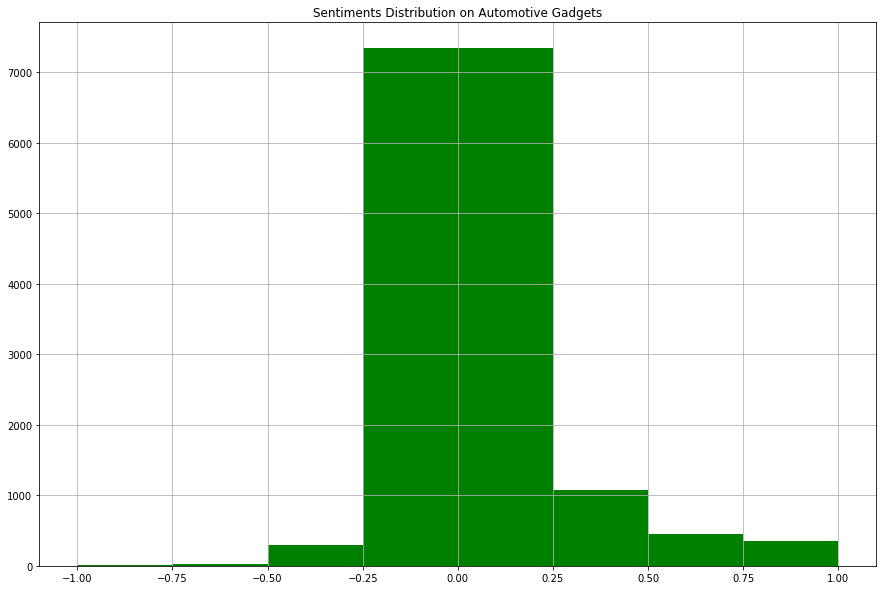

In [378]:
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="green")
plt.title("Sentiments Distribution on Automotive Gadgets")
plt.show()

# Category from Polarity

In [379]:
sentiment_df.groupby('Polarity').size()

Polarity
-1.00      3
-0.80     11
-0.70      8
-0.60      2
-0.60      6
        ... 
 0.75     17
 0.80    205
 0.85      1
 0.90      9
 1.00    124
Length: 449, dtype: int64

In [380]:
bins=(-1.00000,0.000000,1.000000)
names=['Negative','Positive']
sentiment_df['Polarity_type']=pd.cut(sentiment_df['Polarity'],bins,labels=names)

In [381]:
sentiment_df.groupby('Polarity_type').size()

Polarity_type
Negative    6293
Positive    3250
dtype: int64

In [382]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       9546 non-null   float64 
 1   User Comments  9546 non-null   object  
 2   Polarity_type  9543 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [383]:
sentiment_df.columns

Index(['Polarity', 'User Comments', 'Polarity_type'], dtype='object')

In [384]:
sentiment_df.columns = ['Polarity', 'UserComments', 'Polarity_type']

In [385]:
dfp = pd.DataFrame(data=sentiment_df,
                    columns=['Polarity', 'UserComments', 'Polarity_type'])
dfp

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Negative
1,0.0,promis multi card reader leav review im still ...,Negative
2,0.0,hello apeman team respond email fix issu multi...,Negative
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Negative
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Negative
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Negative


***Identify & Treat NaN***

In [386]:
pandas.isnull(dfp)

,Polarity,UserComments,Polarity_type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9541,False,False,False
9542,False,False,False
9543,False,False,False
9544,False,False,False


In [387]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dataN_series = pd.isnull(dfp["Polarity_type"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dfp[dataN_series]

,Polarity,UserComments,Polarity_type
832,-1.0,evil lurk night alexhest evil almost readi ssa...,NaN
5747,-1.0,worst case autonom futur requir pedestrian bic...,NaN
6747,-1.0,bleak futur singleoccup autonom car could incr...,NaN


In [388]:
# importing pandas module 
import pandas as pd 

# making data frame from csv file 
#dataN2 = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# replacing na values in college with No college 
#dataN2["Polarity_type"].fillna("Negative", inplace = True) 
dfp["Polarity_type"].fillna("Negative", inplace = True)

dfp

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Negative
1,0.0,promis multi card reader leav review im still ...,Negative
2,0.0,hello apeman team respond email fix issu multi...,Negative
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative
...,...,...,...
9541,0.3,see fun begin xboxnintendoswitch playstat,Positive
9542,0.0,inch fhd p dvr camera recorderwhatsappwechat a...,Negative
9543,0.0,inch fhd p dvr camera record whatsappwechat au...,Negative
9544,0.0,autobrighttech autobrighttech caraccessori aut...,Negative


In [389]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       9546 non-null   float64 
 1   UserComments   9546 non-null   object  
 2   Polarity_type  9546 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 158.7+ KB


In [390]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category.xlsx')
dfp.to_excel(writer,'Sheet1',index=False)
writer.save()

# EDA of Catarorized Data

In [391]:
dfc = pd.read_excel('/content/export_User_Comments_Polarity_Category_clean_02.xlsx')

In [392]:
corpus = [] # form an empty list called corpus1
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 8118): # iterate through the list of all 8118 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',dfc.UserComments[i])
  # convert all words to lower case
  df_cln = df_cln.lower()
  # split sentences into words
  df_cln = df_cln.split()
  # remove English stop words
  df_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  df_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  df_cln = " ".join(df_cln)
  # append to the list to get all Comments in one place
  corpus.append(df_cln)
#print(corpus)

In [393]:
dfc.describe

<bound method NDFrame.describe of       Polarity                                       UserComments Polarity_type
0     0.000000            bought projector clueless connect iphon      Negative
1     0.000000  promis multi card reader leav review im still ...      Negative
2     0.000000  hello apeman team respond email fix issu multi...      Negative
3     0.800000  great pictur excit look k camerajust need pric...      Positive
4     0.000000  bought apeman dashcam find rear camer cabl met...      Negative
...        ...                                                ...           ...
8113  0.159091  appl add five new arcad game free trial draw c...      Positive
8114  0.175000  offer awesom design ms true wireless earbud re...      Positive
8115  0.175325     creat happi new smart g phone cellecorcellecor      Positive
8116  0.315873  line women h smart quick train shoe line breat...      Positive
8117  0.212121  new arriv p hot wheel blade raider diecast car...      Positive

[8118

In [394]:
dfc.columns
dfc.info()
dfc.shape

Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       8118 non-null   float64
 1   UserComments   8118 non-null   object 
 2   Polarity_type  8118 non-null   object 
dtypes: float64(1), object(2)
memory usage: 190.4+ KB


(8118, 3)

In [395]:
dfc.head()

,Polarity,UserComments,Polarity_type
0,0.0,bought projector clueless connect iphon,Negative
1,0.0,promis multi card reader leav review im still ...,Negative
2,0.0,hello apeman team respond email fix issu multi...,Negative
3,0.8,great pictur excit look k camerajust need pric...,Positive
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative


In [396]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


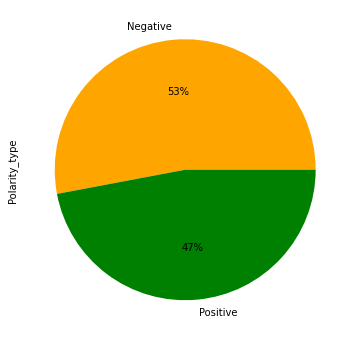

In [397]:
dfc.Polarity_type.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["orange","green","red"])

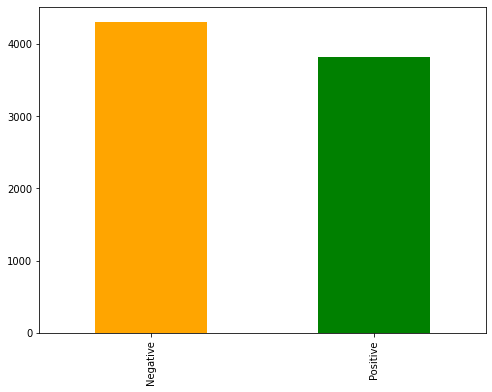

In [398]:
dfc.Polarity_type.value_counts().plot(kind='bar',  color=["orange","green","red"])

# Label Encoding

In [399]:
#convert Polaty_type Negative, Neutral and Positive to 1, 2, 3
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [400]:
le.fit(dfc['Polarity_type'])

LabelEncoder()

In [401]:
list(le.classes_)

['Negative', 'Positive']

In [402]:
dfn = le.transform(dfc['Polarity_type'])

In [403]:
le.inverse_transform([0,1])

array(['Negative', 'Positive'], dtype=object)

In [404]:
dfc['Category'] = dfn
dfc.info()
dfc.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       8118 non-null   float64
 1   UserComments   8118 non-null   object 
 2   Polarity_type  8118 non-null   object 
 3   Category       8118 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 253.8+ KB


Index(['Polarity', 'UserComments', 'Polarity_type', 'Category'], dtype='object')

In [405]:
dfc[3500:3520]

,Polarity,UserComments,Polarity_type,Category
3500,0.090909,new essenti phone total new form factori follo...,Positive,1
3501,0.214286,hoverboard bluetooth speaker electr giroskut w...,Positive,1
3502,0.000000,techelectronicscomputersgadget wireless blueto...,Negative,0
3503,0.383333,pcslot wholesal nmnm full spectrum led grow ch...,Positive,1
3504,0.320000,pcslot sd card gbgb cart sd memori card wholes...,Positive,1
3505,0.000000,amazon travel master lock tsa accept luggag lo...,Negative,0
3506,-0.400000,marvel aveng game length hint stori run cours ...,Negative,0
3507,0.000000,tech gadget mah dual usb power bank smartphon,Negative,0
3508,0.000000,xiaomi screen protector miband smarttechgadget...,Negative,0
3509,-0.166667,gadget telesin dome port waterproof case hous ...,Negative,0


In [406]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category_Label.xlsx')
dfc.to_excel(writer,'Sheet1',index=False)
writer.save()

# TF-IDF

***Vectorizing Dataset using TF-IDF***

In [407]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(corpus).toarray()

In [408]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, dfc.Category, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6494, 1898)
(1624, 1898)
(6494,)
(1624,)


# Random Forest Classifier

In [409]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

***Making Predictions and Evaluating the Model***

In [410]:
predictions = text_classifier.predict(X_test)

In [411]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[801  57]
 [111 655]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       858
           1       0.92      0.86      0.89       766

    accuracy                           0.90      1624
   macro avg       0.90      0.89      0.90      1624
weighted avg       0.90      0.90      0.90      1624

0.896551724137931


# Prediction Models

In [412]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [413]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [414]:
dfc['clean_comment']=dfp['UserComments'].apply(lambda x: comment_to_words(x))
dfc['comment_length']=dfp['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dfc,test_size=0.25,random_state=42)

In [415]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [416]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [418]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.5364532019704433
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      2030
           1       0.00      0.00      0.00         0

    accuracy                           0.54      2030
   macro avg       0.50      0.27      0.35      2030
weighted avg       1.00      0.54      0.70      2030



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62f2754a90>)

([<matplotlib.axis.XTick at 0x7f62f26b86d8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f62df3d95c0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

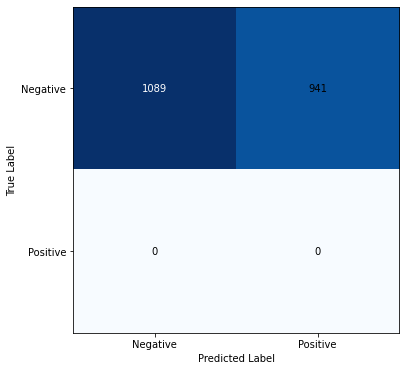

Accuracy of DecisionTreeClassifier is 0.5167487684729064
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1182
           1       0.43      0.48      0.45       848

    accuracy                           0.52      2030
   macro avg       0.51      0.51      0.51      2030
weighted avg       0.52      0.52      0.52      2030



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62dffd6438>)

([<matplotlib.axis.XTick at 0x7f62e223a4e0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f62e2227160>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

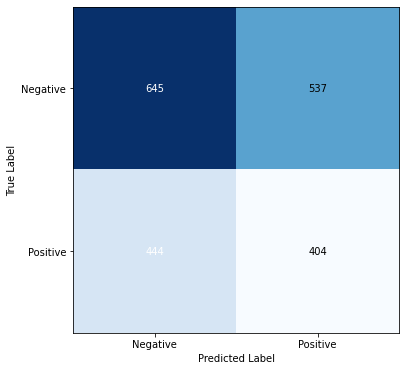

Accuracy of RandomForestClassifier is 0.5374384236453202
              precision    recall  f1-score   support

           0       0.70      0.55      0.62      1376
           1       0.35      0.50      0.41       654

    accuracy                           0.54      2030
   macro avg       0.52      0.53      0.52      2030
weighted avg       0.59      0.54      0.55      2030



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62f13b4550>)

([<matplotlib.axis.XTick at 0x7f62f275b358>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f62f275bf98>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

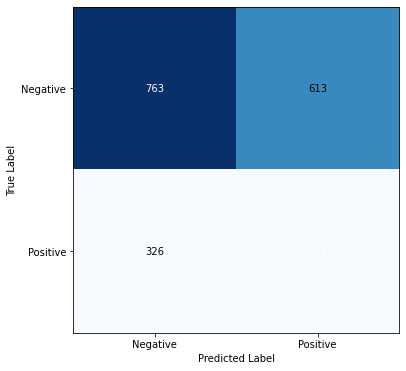

Accuracy of GradientBoostingClassifier is 0.5463054187192118
              precision    recall  f1-score   support

           0       0.90      0.55      0.68      1798
           1       0.13      0.54      0.21       232

    accuracy                           0.55      2030
   macro avg       0.52      0.54      0.45      2030
weighted avg       0.81      0.55      0.63      2030



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62f14c5198>)

([<matplotlib.axis.XTick at 0x7f62f14d8240>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f62f14d8eb8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

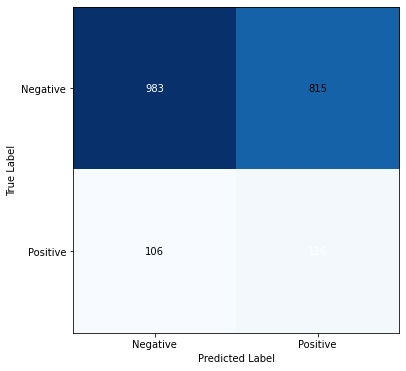

Accuracy of GaussianNB is 0.48719211822660097
              precision    recall  f1-score   support

           0       0.26      0.55      0.35       514
           1       0.75      0.47      0.58      1516

    accuracy                           0.49      2030
   macro avg       0.51      0.51      0.46      2030
weighted avg       0.63      0.49      0.52      2030



<Figure size 576x432 with 0 Axes>

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62f2fa3ef0>)

([<matplotlib.axis.XTick at 0x7f62f1120a58>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7f62f113e6d8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 576x432 with 0 Axes>

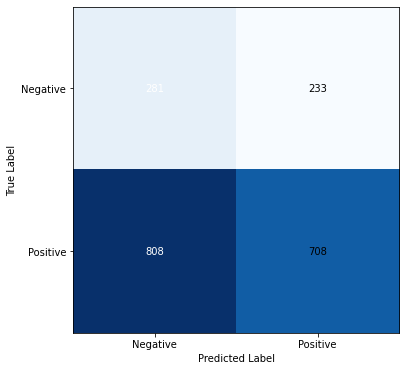

In [419]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Category'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Category'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Category'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Category']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Category'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Multinomial Naive Bayes model

In [420]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [421]:
%time nb.fit(X_train, y_train)

CPU times: user 77.7 ms, sys: 7 ms, total: 84.7 ms
Wall time: 60.8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [422]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)

In [423]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8004926108374384

In [424]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[727, 131],
       [193, 573]])

# Topic Modeling

In [425]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [426]:
#Now let's look at our document term matrix:
doc_term_matrix

<8118x5268 sparse matrix of type '<class 'numpy.int64'>'
	with 66951 stored elements in Compressed Sparse Row format>

***Latent Dirichlet Allocation (LDA)***

In [427]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [428]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

leaksamsung
trooss
primari
sconc
rig
cream
armour
th
ornament
logist


In [429]:
# Let's find 10 words with the highest probability for the first topic. To get the first topic, 
# you can use the components_ attribute and pass a 0 index as the value:
first_topic = LDA.components_[0]
print(first_topic)

[3.97594237 2.19999307 0.20027007 ... 0.20000601 2.19998078 0.20001349]


In [430]:
top_topic_words = first_topic.argsort()[-10:]
print(top_topic_words)

[2697  704  735 3117  328 1529  745  330 1531  734]


In [431]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

light
camera
caraccessori
new
autoaccessori
electr
carcamera
autobrighttech
electriccar
car


In [432]:
#Let's print the 10 words with highest probabilities for all the five topics:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['light', 'camera', 'caraccessori', 'new', 'autoaccessori', 'electr', 'carcamera', 'autobrighttech', 'electriccar', 'car']


Top 10 words for topic #1:
['futur', 'selfdriv', 'vehicl', 'electriccar', 'autonom', 'electr', 'camera', 'autonomousvehicl', 'car', 'smart']


Top 10 words for topic #2:
['babi', 'audio', 'men', 'fashion', 'shop', 'electron', 'women', 'gift', 'watch', 'gadget']


Top 10 words for topic #3:
['drive', 'use', 'amazon', 'work', 'new', 'googl', 'great', 'dashboard', 'travel', 'gadget']


Top 10 words for topic #4:
['plate', 'light', 'bluetooth', 'case', 'usb', 'car', 'wireless', 'technolog', 'tech', 'gadget']




In [433]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(8118, 5)

In [434]:
dfc['Topic'] = topic_values.argmax(axis=1)

In [435]:
dfc.head(10)

,Polarity,UserComments,Polarity_type,Category,clean_comment,comment_length,Topic
0,0.0,bought projector clueless connect iphon,Negative,0,bought projector clueless connect iphon,5,3
1,0.0,promis multi card reader leav review im still ...,Negative,0,promis multi card reader leav review im still ...,10,4
2,0.0,hello apeman team respond email fix issu multi...,Negative,0,hello apeman team respond email fix issu multi...,9,0
3,0.8,great pictur excit look k camerajust need pric...,Positive,1,great pictur excit look k camerajust need pric...,21,1
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative,0,bought apeman dashcam find rear camer cabl met...,15,0
5,0.0,possibl tri,Negative,0,possibl tri,2,2
6,0.0,abandon electriccar project reinforc argument ...,Negative,0,price,1,0
7,0.0,terribl compani product china,Negative,0,terribl compani product china,4,2
8,0.0,sayhidden design hid,Negative,0,sayhidden design hid,3,4
9,0.0,hello camera apeman app use wifi,Negative,0,hello camera apeman app use wifi,6,0


***Non-Negative Matrix Factorization (NMF)***

In [436]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(dfc['UserComments'].values.astype('U'))

In [437]:
# Once the document term matrix is generated, we can create a probability matrix that contains probabilities of all the words
# in the vocabulary for all the topics. To do so, we can use the NMF class from the sklearn.decomposition module. 
# Look at the following script:

from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [438]:
#As we did in the previous section, let's randomly get 10 words from our vocabulary:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

groceri
multipurpos
languag
wallpap
nois
spotlight
distanc
nmnm
anti
barbara


In [439]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [440]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

twin
dji
subwoof
knew
wash
cc
account
true
ultrathin
ck


In [441]:
first_topics = nmf.components_[0]
top_topic_words = first_topics.argsort()[-10:]

In [442]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

techi
bluetooth
iphon
smart
wireless
watch
electron
technolog
tech
gadget


In [443]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['techi', 'bluetooth', 'iphon', 'smart', 'wireless', 'watch', 'electron', 'technolog', 'tech', 'gadget']


Top 10 words for topic #1:
['charg', 'project', 'scrap', 'tesla', 'electricvehicl', 'car', 'ev', 'dyson', 'electr', 'electriccar']


Top 10 words for topic #2:
['meee', 'selfdriv', 'film', 'decid', 'happi', 'new', 'light', 'plate', 'pleas', 'car']


Top 10 words for topic #3:
['amazon', 'check', 'dash', 'worri', 'drive', 'eas', 'cam', 'journey', 'travel', 'great']


Top 10 words for topic #4:
['inch', 'carcamerarecord', 'caraccessori', 'vehicleaccessori', 'autoaccessori', 'otoaccessori', 'camera', 'dvr', 'carcamera', 'autobrighttech']




In [444]:
topic_values = nmf.transform(doc_term_matrix)
dfc['Topics'] = topic_values.argmax(axis=1)
dfc.head(5)

,Polarity,UserComments,Polarity_type,Category,clean_comment,comment_length,Topic,Topics
0,0.0,bought projector clueless connect iphon,Negative,0,bought projector clueless connect iphon,5,3,0
1,0.0,promis multi card reader leav review im still ...,Negative,0,promis multi card reader leav review im still ...,10,4,2
2,0.0,hello apeman team respond email fix issu multi...,Negative,0,hello apeman team respond email fix issu multi...,9,0,2
3,0.8,great pictur excit look k camerajust need pric...,Positive,1,great pictur excit look k camerajust need pric...,21,1,3
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative,0,bought apeman dashcam find rear camer cabl met...,15,0,4


In [445]:
dfpr = pd.read_excel('export_User_Comments_Polarity_Category_Label.xlsx')

In [446]:
dfpr.head()

,Polarity,UserComments,Polarity_type,Category
0,0.0,bought projector clueless connect iphon,Negative,0
1,0.0,promis multi card reader leav review im still ...,Negative,0
2,0.0,hello apeman team respond email fix issu multi...,Negative,0
3,0.8,great pictur excit look k camerajust need pric...,Positive,1
4,0.0,bought apeman dashcam find rear camer cabl met...,Negative,0


In [447]:
#Check for NaN values in each column
dfpr.isna().sum()
#Percentage of NaN values
((len(dfpr)-dfpr.count())/len(dfpr))*100

Polarity         0
UserComments     0
Polarity_type    0
Category         0
dtype: int64

Polarity         0.0
UserComments     0.0
Polarity_type    0.0
Category         0.0
dtype: float64

In [448]:
#dfp.UserComments = dfp.UserComments.astype(str)
#dfp['UserComments'] = dfp['UserComments'].astype('|S')
dfpr['UserComments'] = dfpr['UserComments'].astype(str)

In [449]:
dfpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       8118 non-null   float64
 1   UserComments   8118 non-null   object 
 2   Polarity_type  8118 non-null   object 
 3   Category       8118 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 253.8+ KB


# Comparison of Model Accuracies

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7f62f3808eb8>,
 [Text(0, 0, 'SVC'),
  Text(0, 0, 'DecisionTreeClassifier'),
  Text(0, 0, 'RandomForestClassifier'),
  Text(0, 0, 'GradientBoostingClassifier'),
  Text(0, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

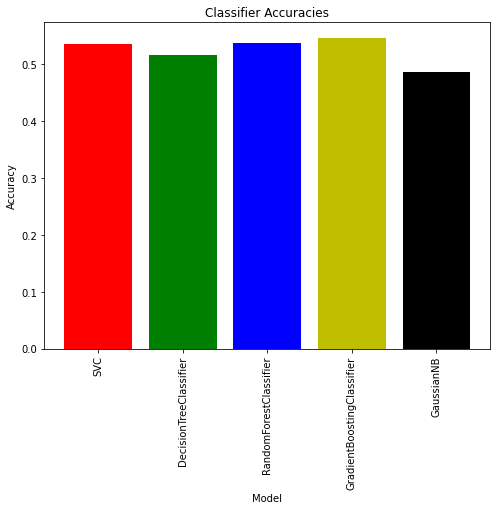

In [450]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')